# EDA

In [19]:
import numpy as np
import pandas as pd
from haversine import haversine, Unit
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import pickle


In [2]:
df = pd.read_csv("/workspaces/Emiliano0041-IntroML/data/raw/AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Conocecmos el data set con el que vamos a trabajar
- Para eso nos interesan algunas cosas como el tamaño en filas y columnas y las columnas que tenemos.

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

###

- Con df.drop verificamos que no haya ningun alojamiento duplicado.

In [4]:
df.drop("id", axis=1).duplicated().sum()

np.int64(0)

- Con esto nos damos cuenta que hay casi 11,5 mil hostes que administran mas de un alojamiento. Dato que quizas nos pueda servir mas adelante.

In [5]:
df.duplicated("host_id").sum()

np.int64(11438)

- En este punto lo que hago es eliminar las columnas que no considero relevantes para el estudio, como lo son el nombre del alojamiento, el nombre del host, la ultima review, las reviews por mes, la cantidad de reviews y la lista calculada de hostes.


In [6]:
df.drop(["name", "host_name","last_review","reviews_per_month","calculated_host_listings_count", "number_of_reviews"], axis=1, inplace=True)


- Lo que hago a continuacion es eliminar todos los alojamientos que tengan como precio = 0, ya que pueden ser errores que me pueden entorpecer el analisis. 

In [7]:
df = df[df["price"] > 0]


- Ahora cree una nueva columna, determinando la latitud y longitud del Time square, en la que podemos apreciar la distancia de cada alojamiento a esta atraccion turistica, una de las mas famosas de Nueva York.

- Para esto importe haversine, funcion que nos permite calcular distancias geograficas si tenemos latitud y longitud, hacia un punto de interes.

In [8]:
time_square = (40.7580, -73.9855)
df["distance_time_square"] = df.apply(lambda row : 
                                      haversine((row["latitude"], row["longitude"]), 
                                                time_square, unit=Unit.KILOMETERS), axis=1)


/tmp/ipykernel_1170/390003814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["distance_time_square"] = df.apply(lambda row :


- Aqui lo que hago es crear nuevas columnas "room_type_n", "neighbourhood_group_n" y "neighbourhood_n" en donde le otorgo un valor numerico al tipo de alojamiento, barrio y distrito.

- Con esto ya podemos usar estas tres columnas en analisis estadisticos numericos

In [9]:
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
   
df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]

df["room_type_n"] = pd.factorize(df["room_type"])[0]   

/tmp/ipykernel_1170/183499316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
/tmp/ipykernel_1170/183499316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]
/tmp/ipykernel_1170/183499316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

- Ahora con .describe() podemos conocer a fondo alguna de las medidas estadisticas que nos serviran para sacar algunas conclusiones. Dude si redondear algunos resultados y convertir los numeros a enteros para no dejarlos en notacion cientifica, pero quiero ser preciso en mis estadisticas, por eso lo dejo asi.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48884.0,1.901679e+07,1.098432e+07,2539.000000,9.470548e+06,1.967574e+07,2.915297e+07,3.648724e+07
host_id,48884.0,6.762203e+07,7.861666e+07,2438.000000,7.817310e+06,3.079257e+07,1.074344e+08,2.743213e+08
latitude,48884.0,4.072895e+01,5.453177e-02,40.499790,4.069010e+01,4.072308e+01,4.076312e+01,4.091306e+01
longitude,48884.0,-7.395218e+01,4.615874e-02,-74.244420,-7.398308e+01,-7.395569e+01,-7.393629e+01,-7.371299e+01
price,48884.0,1.527551e+02,2.401703e+02,10.000000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48884.0,7.029887e+00,2.051222e+01,1.000000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
availability_365,48884.0,1.127795e+02,1.316273e+02,0.000000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02
distance_time_square,48884.0,7.107371e+00,4.437586e+00,0.068493,3.818617e+00,6.389117e+00,9.416950e+00,3.589830e+01
neighbourhood_group_n,48884.0,7.869855e-01,8.442879e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
neighbourhood_n,48884.0,2.988953e+01,3.467386e+01,0.000000,8.000000e+00,1.900000e+01,3.700000e+01,2.200000e+02


<Axes: >

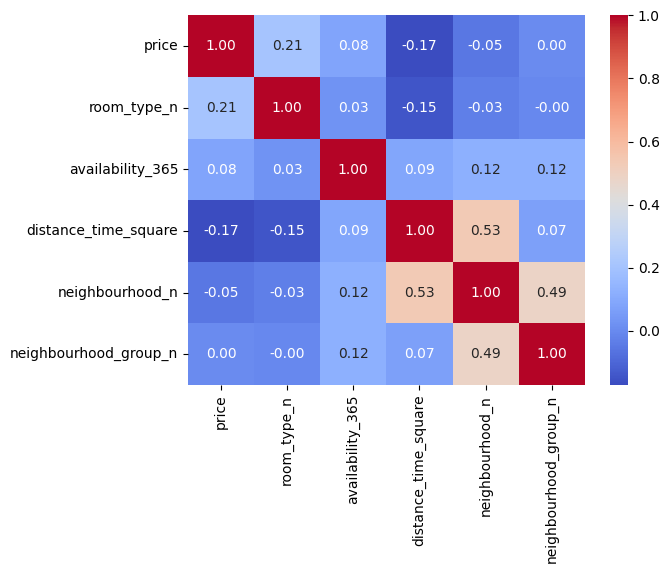

In [11]:
sns.heatmap(df[["price", "room_type_n", "availability_365", "distance_time_square", "neighbourhood_n", "neighbourhood_group_n"]].corr(),
            annot=True, fmt=".2f", cmap="coolwarm") 

- Viendo el grafico heatmap anterior, podemos sacar algunas conclusiones sobre las columnas que tienen correlacion con la que me interesa, en este caso "price" y algunas otras curiosidades. 

--- Podemos apreciar que el precio esta relacionado en un 0.21 con el tipo de alojamiento.

--- Tambien podemos ver que el precio esta relacionado con un -0.17 con la distancia al time square.Analizando esto podemos razonar que a medida que la distancia disminuye, el precio aumentara.

--- Otra curiosdad que encontramos es que la disponibilidad de los alojamientos esta relacionada en un 0.12 con el barrio en donde se encuentra.

--- Econtramos tambien, que la distancia al time square esta relacionada en un -0.15 con el tipo del alojammiento. Queriendo demostrar que a medida que uno disminuye, el otro aumenta.

----

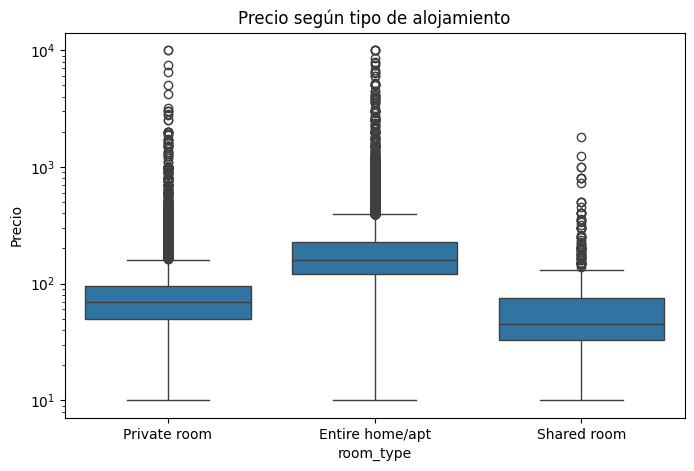

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(df, x="room_type", y="price")
plt.title("Precio según tipo de alojamiento")
plt.ylabel("Precio")
plt.yscale("log")
plt.show()

- Con el grafico boxplot visualizado anteriormente, podemos apreciar que los apartamentos enteros seran los mas caros, seguidos por las habiaciones privadas y terminando con las habitaciones compartidas como era de esperarse.

--- Como curiosidad podemos encontrar que el precio maximo de un apartamento entero, se asimila mucho a la de una habitacion privada. Haciendo referencia a que no necesariamente los precios mas elevados estan si o si en alojamientos enteros.


-----------------------------------------------------------------------------------------------------------

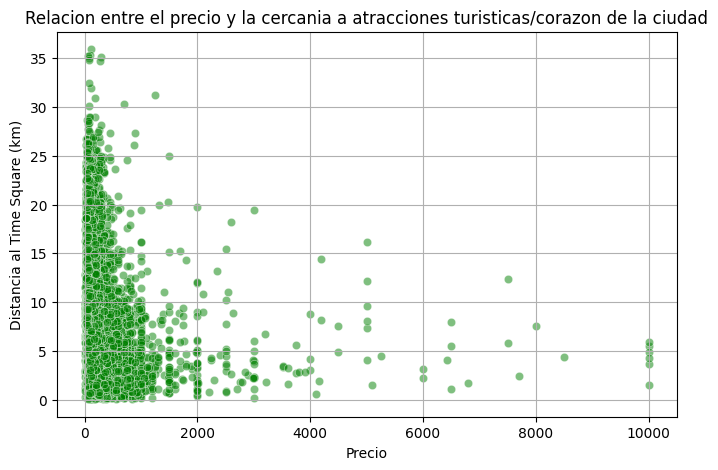

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(df, x="price", y="distance_time_square", color="g", alpha=0.5)
plt.title("Relacion entre el precio y la cercania a atracciones turisticas/corazon de la ciudad")
plt.xlabel("Precio")
plt.ylabel("Distancia al Time Square (km)")
plt.grid(True)

- Con el scatterplot graficado, podemos sacar algunas conclusiones con respecto a la cercania al corazon de la ciudad y su precio. 

--- Encontramos que la mayoria de los precios estan entre 0 y 1000 usd la noche, y su mayoria estan a mas de 5 km de distancia del centro.

--- Podemos razonar que los precios bajos se mantienen si te alejas del centro.

--- Podemos ver que los precios mas altos de todos, estan entre 3 a 6km de distancia del punto de interes dado.


----------------------------------------------------------------------------------------------------------------------------------

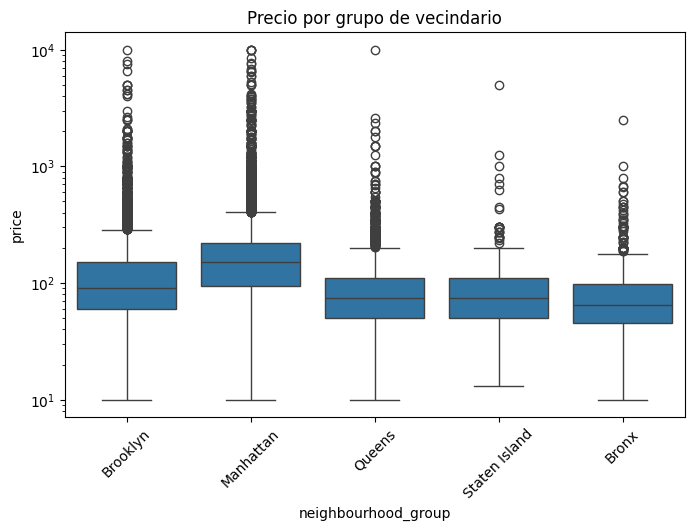

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="neighbourhood_group", y="price")
plt.title("Precio por grupo de vecindario")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()


- En el grafico puesto en escena podemos analizar la relacion entre el precio y el distrito en el que se encuentra.

--- Podemos ver que los precios medios mas altos se encuentran en Manhattan, seguidos por Brooklyn.

--- Tambien podemos apreciar que los precios maximos estan divididos entre Manhattan y Brooklyn, habiendo mas precios altos en Manhattan.

--- Podemos observar que en Queens hay un alojamiento que iguala los precios maximos de Manhattan y Brooklyn.

--- Un dato curioso en el que nos podemos centrar es que el precio mas bajo de Staten Island, es mas alto que los precios mas bajos de las demas ciudades. 

--- El Bronx es el barrio con la media de alojamientos mas baratos

---------------------------------------------------------------------------------------------------------------------------------------

- Con este codigo nos aseguramos de no tener ningun valor nulo en el data set.

In [15]:
df.isnull().sum().sort_values(ascending=True) / len(df)

id                       0.0
host_id                  0.0
neighbourhood_group      0.0
neighbourhood            0.0
latitude                 0.0
longitude                0.0
room_type                0.0
price                    0.0
minimum_nights           0.0
availability_365         0.0
distance_time_square     0.0
neighbourhood_group_n    0.0
neighbourhood_n          0.0
room_type_n              0.0
dtype: float64

- Lo que haremos a continuacion sera dividir convenientemente el data set (df) en train y test, lo que prevendrá que los datos de entrenamiento no se contaminen con los datos del conjunto de pruebas.

In [16]:
variables = ["id", 'minimum_nights', 'availability_365', 'distance_time_square', 
             'neighbourhood_group_n', 'neighbourhood_n',"room_type_n"]

X = df.drop("price", axis=1)[variables]
y = df["price"]      


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size = 0.2, 
                                                     random_state = 42)



- A continuacion realizamos el escalado de valores, tecnica por la cual podemos convertir todos los valores para que sean comparables entre si.

--- Calculando las medias y desviaciones estandar, creamos nuevas variables con los datos escalados y las convertimos a Data Frame. 

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns=variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=variables)



- A continuacion realizamos una seleccion de las variables mas "relevantes" para nuestro modelo, en base al objetivo de predecir el precio de un alojamiento. 

In [18]:
selector = SelectKBest(score_func=f_regression, k=5).fit(X_train, y_train)
selected_cols = X_train.columns[selector.get_support()]

X_train_sel = pd.DataFrame(selector.transform(X_train), columns=selected_cols)
X_test_sel = pd.DataFrame(selector.transform(X_test), columns=selected_cols)

X_train_sel.head()

,minimum_nights,availability_365,distance_time_square,neighbourhood_n,room_type_n
0,3.0,37.0,17.465676,46.0,1.0
1,5.0,0.0,7.454066,12.0,0.0
2,2.0,70.0,18.663415,65.0,0.0
3,14.0,0.0,1.645998,14.0,0.0
4,1.0,0.0,9.728810,16.0,0.0


- Ahora guardamos todo en un pickle.

In [20]:
todo = {
    "scaler" : scaler,
    "selector" : selector,
    "X_train" : X_train,
    "X_test" : X_test,
    "y_train" : y_train,
    "y_test" : y_test
}

with open("datos_y_procesamiento.pkl", "wb") as f:
    pickle.dump(todo,f)